### Blur the output image with Gaussian blur

In [2]:
# install dependacy
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [38]:
# convert yolo input to normal input
def convert_ratio(img,centerx,centery,wide,height):
    img_wide,img_height = img.shape[1],img.shape[0]
    centerx = centerx * img_wide
    centery = centery * img_height
    startx = centerx - wide*img_wide/2
    starty = centery - height*img_height/2
    return int(startx),int(starty),int(wide*img_wide),int(height*img_height)

In [60]:
def blur_image(img):
    image_blurred = cv2.GaussianBlur(img, (9, 9), 1) 
    # Generate noise with same shape as that of the image
    noise = np.random.normal(0,50, image_blurred.shape) 
    # Add the noise to the image
    img_noised = image_blurred + noise
    img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)
    return img_noised   

In [48]:
def get_blur_image(img,startx,starty,wide,height):
    startx,starty,wide,height = convert_ratio(img,startx,starty,wide,height)
    plt.imshow(img)
    plt.show()
    blured_image = np.copy(img)
    crop_image = img[starty : starty + height , startx : startx + wide]
    plt.imshow(crop_image)
    plt.show()
    crop_image_blurred = blur_image(crop_image)
    plt.imshow(crop_image_blurred)
    plt.show()
    blured_image[starty : starty + height , startx : startx + wide] = crop_image_blurred
    plt.imshow(blured_image)
    plt.show()
    return blured_image

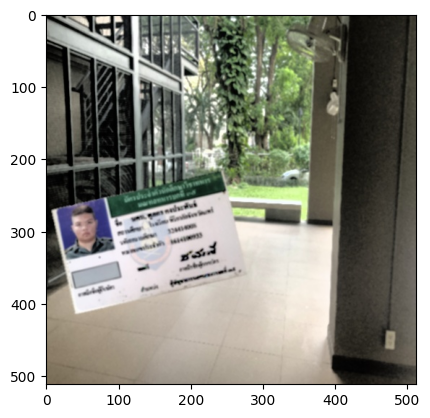

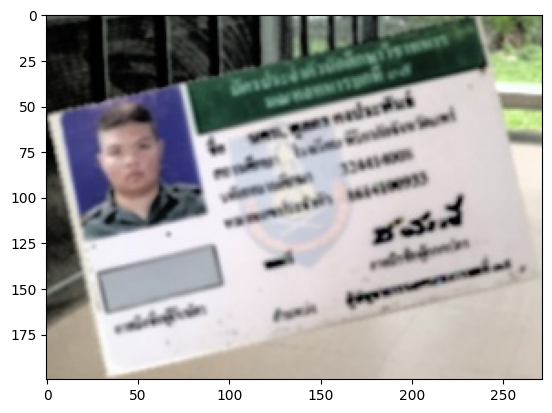

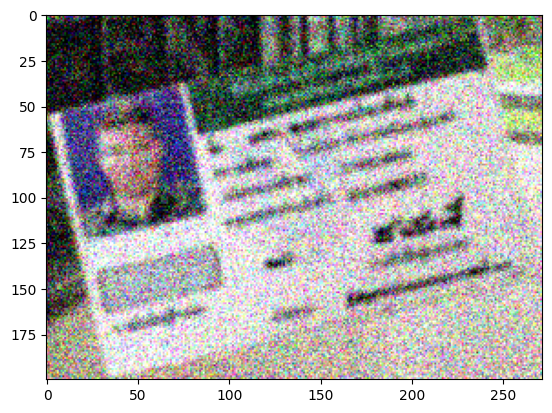

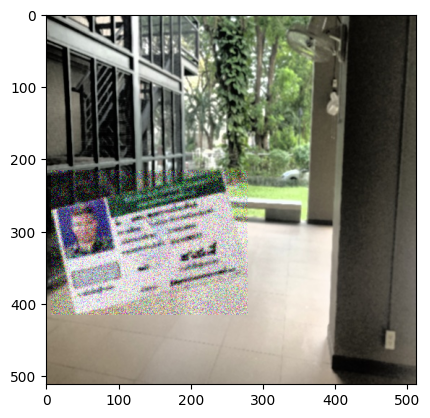

array([[[  3,   3,   3],
        [  0,   0,   0],
        [ 15,  15,  15],
        ...,
        [ 57,  54,  45],
        [ 60,  57,  50],
        [ 60,  57,  50]],

       [[  0,   0,   0],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 59,  56,  47],
        [ 61,  58,  51],
        [ 60,  57,  50]],

       [[  4,   4,   4],
        [  0,   0,   0],
        [  4,   4,   2],
        ...,
        [ 61,  58,  49],
        [ 62,  59,  52],
        [ 61,  58,  51]],

       ...,

       [[123, 108,  87],
        [124, 109,  88],
        [124, 109,  88],
        ...,
        [ 84,  80,  69],
        [ 83,  79,  68],
        [ 84,  80,  69]],

       [[122, 107,  88],
        [124, 109,  90],
        [124, 109,  90],
        ...,
        [ 88,  81,  71],
        [ 87,  80,  70],
        [ 89,  82,  72]],

       [[124, 109,  90],
        [125, 110,  91],
        [125, 110,  91],
        ...,
        [ 89,  82,  72],
        [ 89,  82,  72],
        [ 91,  84,  74]]

In [61]:
# test the blurred function 
img1 = cv2.imread("../Auto-blur-PII/dataset/IMG_0623_pii_card2.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# 1 0.4384765625 0.65234375 0.556640625 0.42578125
# 1 0.279296875 0.6171875 0.53125 0.390625
get_blur_image(img1,0.279296875,0.6171875,0.53125,0.390625)